## **Predicting Hiring Decisions Using Decision Tree Classification with Preprocessing Pipeline**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [181]:
df  = pd.read_csv(r"D:\Machine_Learning\Decision_Tree\Datasets\PastHires.csv")
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [182]:
df.shape

(13, 7)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0


In [185]:
df.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [186]:
df.duplicated().sum()

np.int64(0)

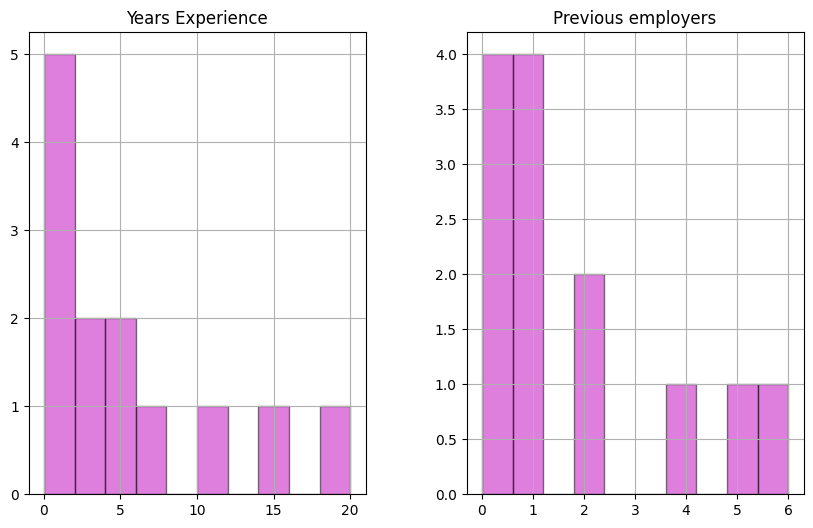

In [187]:
df.hist(figsize=(10,6), bins=10, edgecolor='k', color='m', alpha=0.5)
plt.show()

In [188]:
categoricle = df.select_dtypes(include='object').columns.tolist()
numaricle = df.select_dtypes(exclude='object').columns.tolist()
categorical

['Employed?', 'Level of Education', 'Top-tier school', 'Interned']

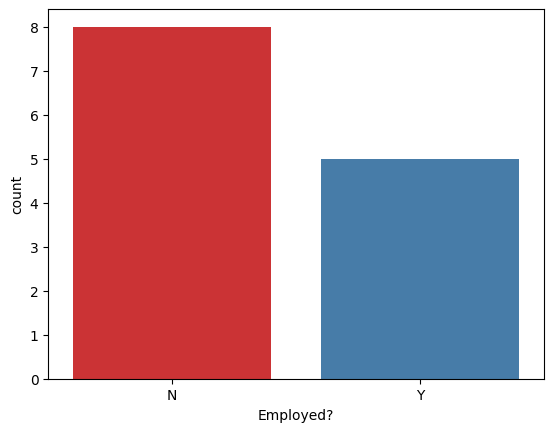

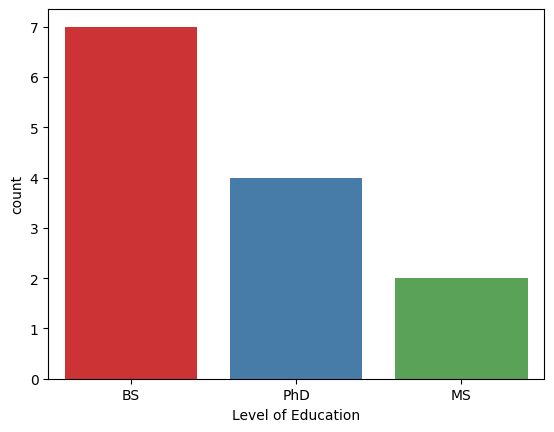

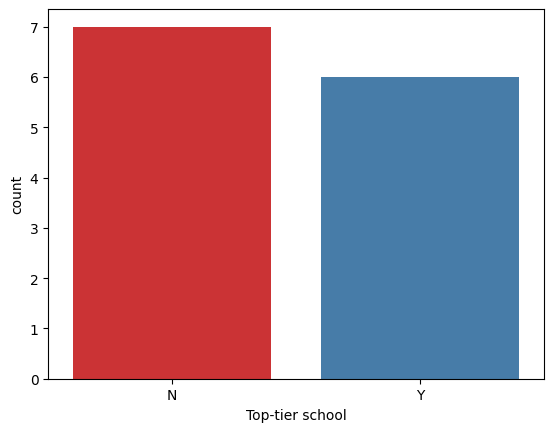

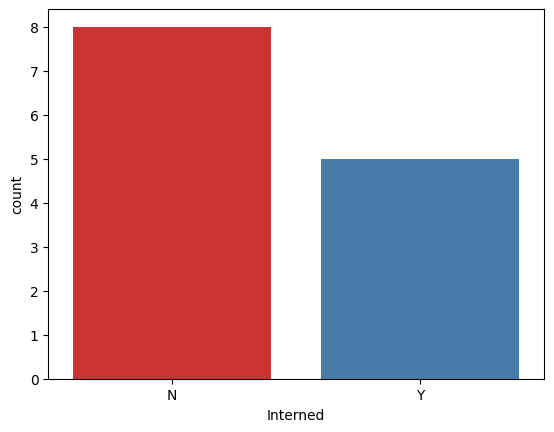

In [189]:
import warnings
warnings.filterwarnings('ignore')
for col in categorical:
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set1')
    plt.show()

In [190]:
x = df.drop('Hired', axis=1)
y = df['Hired']

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'
)

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [193]:
# Final pipeline
clf_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]
)

In [194]:
# Train the model
clf_pipeline.fit(x_train, y_train)
clf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Employed?',
                                                   'Level of Education',
                                                   'Top-tier school',
                                                   'Interned'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [195]:
y_pred = clf_pipeline.predict(x_test)
y_pred

array(['Y', 'Y', 'Y'], dtype=object)

In [196]:
y_test

11    Y
9     N
0     Y
Name: Hired, dtype: object

In [197]:
import math

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))

# Function to calculate conditional entropy
def conditional_entropy(data, feature, target):
    feature_values = data[feature].unique()  # Corrected: use .unique() on the series
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy


# Calculate information gain for each feature

for feature in x:
    ig = information_gain(df,feature,'Hired')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Years Experience: 0.6408676019243735
Information Gain for Employed?: 0.2751070248348759
Information Gain for Previous employers: 0.23739740978310186
Information Gain for Level of Education: 0.11804210329899778
Information Gain for Top-tier school: 0.0019055645046179848
Information Gain for Interned: 0.2751070248348759


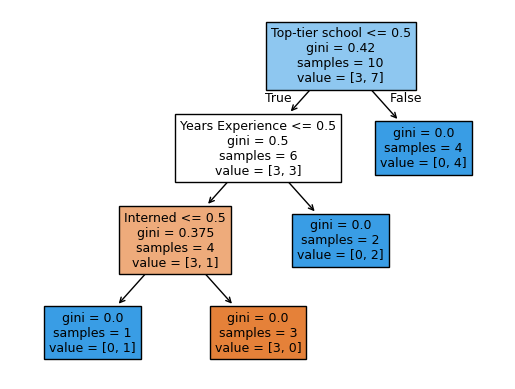

In [198]:
from sklearn import tree
tree.plot_tree(clf_pipeline.named_steps['classifier'], feature_names=x_train.columns, filled=True)
plt.show()

In [199]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [200]:
accuracy = accuracy_score(y_test, y_pred)*100

clasification_report = classification_report(y_test, y_pred)
print("Accuracy",accuracy)
print("Clasification_Report\n", clasification_report)

Accuracy 66.66666666666666
Clasification_Report
               precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [201]:
new_data= pd.DataFrame([[10, 'N', 5, 'BS', 'N', 'N']], columns=df.drop('Hired', axis=1).columns)
prediction = clf_pipeline.predict(new_data)
prediction

array(['N'], dtype=object)

In [202]:
import joblib
joblib.dump(model, 'Classified.pkl')

['Classified.pkl']

In [203]:
c_model = joblib.load('Classified.pkl')
c_model

DecisionTreeClassifier(criterion='entropy')